# Comparison Between TreeValue and Jax LibTree

In this section, we will take a look at the feature and performance of the [jax-libtree](https://jax.readthedocs.io/en/latest/pytrees.html) library, which is developed by Google.

In [1]:
_TREE_DATA_1 = {'a': 1, 'b': 2, 'x': {'c': 3, 'd': 4}}

## Mapping Operation

### TreeValue's Mapping

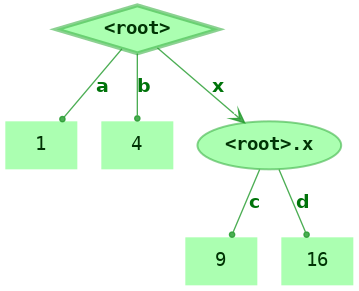

In [2]:
from treevalue import mapping, FastTreeValue

t = FastTreeValue(_TREE_DATA_1)
mapping(t, lambda x: x ** 2)

In [3]:
%timeit mapping(t, lambda x: x ** 2)

3.73 µs ± 32.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


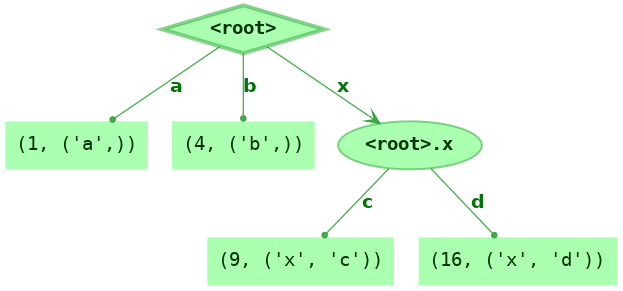

In [4]:
mapping(t, lambda x, p: (x ** 2, p))

In [5]:
%timeit mapping(t, lambda x, p: (x ** 2, p))

3.85 µs ± 38.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### pytree's tree_map

In [6]:
from jax.tree_util import tree_map

tree_map(lambda x: x ** 2, _TREE_DATA_1)

{'a': 1, 'b': 4, 'x': {'c': 9, 'd': 16}}

In [7]:
%timeit tree_map(lambda x: x ** 2, _TREE_DATA_1)

6.78 µs ± 48.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Flatten and Unflatten Operation

### TreeValue's Performance

In [8]:
from treevalue import flatten, flatten_keys, flatten_values

t_flatted = flatten(t)
t_flatted

[(('a',), 1), (('b',), 2), (('x', 'c'), 3), (('x', 'd'), 4)]

In [9]:
%timeit flatten(t)

895 ns ± 5.86 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [10]:
from treevalue import flatten_keys

flatten_keys(t)

[('a',), ('b',), ('x', 'c'), ('x', 'd')]

In [11]:
%timeit flatten_keys(t)

809 ns ± 2.43 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [12]:
from treevalue import flatten_values

flatten_values(t)

[1, 2, 3, 4]

In [13]:
%timeit flatten_values(t)

568 ns ± 6.11 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


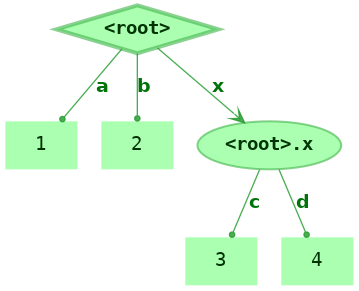

In [14]:
from treevalue import unflatten

unflatten(t_flatted)

In [15]:
%timeit unflatten(t_flatted)

961 ns ± 6.05 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### pytree's Performance

In [16]:
from jax.tree_util import tree_flatten

leaves, treedef = tree_flatten(_TREE_DATA_1)
print('Leaves:', leaves)
print('Treedef:', treedef)

Leaves: [1, 2, 3, 4]
Treedef: PyTreeDef({'a': *, 'b': *, 'x': {'c': *, 'd': *}})


In [17]:
%timeit tree_flatten(_TREE_DATA_1)

2.17 µs ± 49.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [18]:
from jax.tree_util import tree_unflatten

tree_unflatten(treedef, leaves)

{'a': 1, 'b': 2, 'x': {'c': 3, 'd': 4}}

In [19]:
%timeit tree_unflatten(treedef, leaves)

1.01 µs ± 6.52 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## All Operation

### TreeValue's Performance

In [20]:
all(flatten_values(t))

True

In [21]:
%timeit all(flatten_values(t))

695 ns ± 5.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### pytree.tree_all's performance

In [22]:
from jax.tree_util import tree_all

In [23]:
tree_all(_TREE_DATA_1)

True

In [24]:
%timeit tree_all(_TREE_DATA_1)

2.38 µs ± 8.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Reduce Operation

### TreeValue's Reduce

In [25]:
from functools import reduce

def _flatten_reduce(tree):
    values = flatten_values(tree)
    return reduce(lambda x, y: x + y, values)

_flatten_reduce(t)

10

In [26]:
%timeit _flatten_reduce(t)

1.29 µs ± 6.23 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [27]:
def _flatten_reduce_with_init(tree):
    values = flatten_values(tree)
    return reduce(lambda x, y: x + y, values, 0)

_flatten_reduce_with_init(t)

10

In [28]:
%timeit _flatten_reduce_with_init(t)

1.39 µs ± 8.27 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### pytree.tree_reduce

In [29]:
from jax.tree_util import tree_reduce

tree_reduce(lambda x, y: x + y, _TREE_DATA_1)

10

In [30]:
%timeit tree_reduce(lambda x, y: x + y, _TREE_DATA_1)

3.14 µs ± 68.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [31]:
tree_reduce(lambda x, y: x + y, _TREE_DATA_1, 0)

10

In [32]:
%timeit tree_reduce(lambda x, y: x + y, _TREE_DATA_1, 0)

3.29 µs ± 34.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Structure Transpose

### Subside and Rise in TreeValue

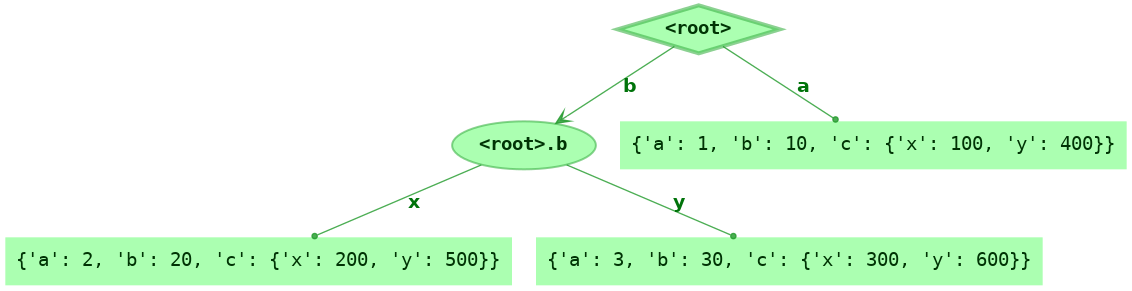

In [33]:
from treevalue import subside

value = {
    'a': FastTreeValue({'a': 1, 'b': {'x': 2, 'y': 3}}),
    'b': FastTreeValue({'a': 10, 'b': {'x': 20, 'y': 30}}),
    'c': {
        'x': FastTreeValue({'a': 100, 'b': {'x': 200, 'y': 300}}),
        'y': FastTreeValue({'a': 400, 'b': {'x': 500, 'y': 600}}),
    },
}
subside(value)

In [34]:
%timeit subside(value)

16.4 µs ± 67.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [35]:
from treevalue import raw, rise

value = FastTreeValue({
    'a': raw({'a': 1, 'b': {'x': 2, 'y': 3}}),
    'b': raw({'a': 10, 'b': {'x': 20, 'y': 30}}),
    'c': {
        'x': raw({'a': 100, 'b': {'x': 200, 'y': 300}}),
        'y': raw({'a': 400, 'b': {'x': 500, 'y': 600}}),
    },
})
rise(value)

{'b': {'x': <FastTreeValue 0x7f602043c460>
  ├── 'a' --> 2
  ├── 'b' --> 20
  └── 'c' --> <FastTreeValue 0x7f602043cac0>
      ├── 'x' --> 200
      └── 'y' --> 500,
  'y': <FastTreeValue 0x7f602043c3d0>
  ├── 'a' --> 3
  ├── 'b' --> 30
  └── 'c' --> <FastTreeValue 0x7f602043cb50>
      ├── 'x' --> 300
      └── 'y' --> 600},
 'a': <FastTreeValue 0x7f602043c850>
 ├── 'a' --> 1
 ├── 'b' --> 10
 └── 'c' --> <FastTreeValue 0x7f602043c490>
     ├── 'x' --> 100
     └── 'y' --> 400}

In [36]:
%timeit rise(value)

18.4 µs ± 81 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [37]:
vt = {'a': None, 'b': {'x': None, 'y': None}}
rise(value, template=vt)

{'a': <FastTreeValue 0x7f5f88bb6760>
 ├── 'a' --> 1
 ├── 'b' --> 10
 └── 'c' --> <FastTreeValue 0x7f5f88bb6d30>
     ├── 'x' --> 100
     └── 'y' --> 400,
 'b': {'x': <FastTreeValue 0x7f5f88bb6640>
  ├── 'a' --> 2
  ├── 'b' --> 20
  └── 'c' --> <FastTreeValue 0x7f5f88bb69a0>
      ├── 'x' --> 200
      └── 'y' --> 500,
  'y': <FastTreeValue 0x7f5f88bb6be0>
  ├── 'a' --> 3
  ├── 'b' --> 30
  └── 'c' --> <FastTreeValue 0x7f5f88bb6c10>
      ├── 'x' --> 300
      └── 'y' --> 600}}

In [38]:
%timeit rise(value, template=vt)

14.6 µs ± 69.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### pytree.tree_transpose

In [39]:
from jax.tree_util import tree_structure, tree_transpose

sto = tree_structure({'a': 1, 'b': 2, 'c': {'x': 3, 'y': 4}})
sti = tree_structure({'a': 1, 'b': {'x': 2, 'y': 3}})

value = (
    {'a': 1, 'b': {'x': 2, 'y': 3}},
    {
        'a': {'a': 10, 'b': {'x': 20, 'y': 30}},
        'b': [
            {'a': 100, 'b': {'x': 200, 'y': 300}},
            {'a': 400, 'b': {'x': 500, 'y': 600}},
        ],
    }
)
tree_transpose(sto, sti, value)

{'a': {'a': 1, 'b': 10, 'c': {'x': 100, 'y': 400}},
 'b': {'x': {'a': 2, 'b': 20, 'c': {'x': 200, 'y': 500}},
  'y': {'a': 3, 'b': 30, 'c': {'x': 300, 'y': 600}}}}

In [40]:
%timeit tree_transpose(sto, sti, value)

15.9 µs ± 63.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
